
# Project: Data Wrangling

## Table of Contents
<ul>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#store">Store</a></li>
<li><a href="#analyze">Analysis and Visualization</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gather'></a>
## Gather

In [2]:
# Load CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download image_predictions.tsv from Udacity's servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [5]:
# Load image_predictions.tsv
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [ ]:
# Get Twitter's API Data
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
"""
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""

In [6]:
with open('tweet-json.txt') as file:
    tweet_info = pd.DataFrame(columns = ['tweet_id', 'favorites', 'retweets'])
    for line in file:
        tweet = json.loads(line)
        tweet_info = tweet_info.append({'tweet_id': tweet['id'],'favorites': tweet['favorite_count'],'retweets': tweet['retweet_count']}, ignore_index=True)
        
        

<a id='assess'></a>
## Assess

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
225,849051919805034497,NaN,NaN,2017-04-04 00:12:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. Kevin doesn't give a single h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849051919...,13,10,Kevin,None,None,None,None
2211,668614819948453888,NaN,NaN,2015-11-23 02:19:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a horned dog. Much grace. Can jump ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668614819...,7,10,a,None,None,None,None
2049,671504605491109889,NaN,NaN,2015-12-01 01:42:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He was just informed that dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671504605...,11,10,Charlie,None,None,None,None
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edmund. He sends stellar selfies. Cute...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742150209...,8,10,Edmund,None,None,pupper,None
1173,720340705894408192,NaN,NaN,2016-04-13 19:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He just got balled on. Can't ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720340705...,10,10,Derek,None,None,pupper,None
1147,726935089318363137,NaN,NaN,2016-05-02 00:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprout. He's just precious af. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726935089...,12,10,Sprout,None,None,None,None
642,793210959003287553,NaN,NaN,2016-10-31 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maude. She's the h*ckin happiest wasp ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793210959...,10,10,Maude,None,None,None,None
1194,717428917016076293,NaN,NaN,2016-04-05 19:09:17 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Skittle. He's trying to communicate. 1...,NaN,NaN,NaN,https://vine.co/v/iIhEU2lVqxz,11,10,Skittle,None,None,None,None
2251,667806454573760512,NaN,NaN,2015-11-20 20:47:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Filup. He is overcome with joy after f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667806454...,10,10,Filup,None,None,None,None


In [9]:
# See what the texts look like
twitter_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

The text contains the rating score and the url

In [10]:
twitter_archive.query('name == "None"').tweet_id.count()

745

In [11]:
twitter_archive.name.value_counts().head()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Name: name, dtype: int64

Many dog names are 'None', should be changed to NaN. 

In [12]:
tweet_info.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [13]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
# Check the number of rows in three tables
twitter_archive.shape

(2356, 17)

In [15]:
tweet_info.shape

(2354, 3)

In [16]:
image_predictions.shape

(2075, 12)

From above, the tweet_info and image_predictions tables seem to have fewer data records comparing with the twitter_archive table.

To see if there are any missing data, comparing the data coverage of the three tables.

In [17]:
image_predictions.tweet_id.isin(twitter_archive.tweet_id).all()

True

In [18]:
tweet_info.tweet_id.isin(twitter_archive.tweet_id).all()

True

In [19]:
image_predictions.tweet_id.isin(tweet_info.tweet_id).all()

False

It seems there are some missing records in image_predictions and tweet_info.

In [20]:
# Check is there any duplicated tweet id
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [22]:
tweet_info[tweet_info.tweet_id.duplicated()]

,tweet_id,favorites,retweets


No duplicated tweet ids are found in three tables.

In [23]:
# Check is there any duplicated image url in image_predictions
image_predictions[image_predictions.jpg_url.duplicated()].tweet_id.count()

66

In [24]:
# Get some examples of the duplicated jpg url
image_predictions[image_predictions.jpg_url.duplicated(keep=False)].sort_values(by='jpg_url').head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


Some breed names are capitalized, some are not.

In [25]:
# Check if there are any relationships between the duplicated records
twitter_archive.query('tweet_id == 675354435921575936')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1865,675354435921575936,NaN,NaN,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Everyone needs to watch this. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None


In [26]:
twitter_archive.query('tweet_id == 752309394570878976')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
949,752309394570878976,NaN,NaN,2016-07-11 01:11:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None


The records with duplicated jpg_url are retweets.

In [27]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Most of the data in columns related to reply and retweet are missing, so the columns are not very useful for this table.

The data type of the tweet id is int, which should be string.

The timestamp and retweeted_status_timestamp's data types are string, which are not appropriate.

In [28]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Some rating denominators are not ten.

In [29]:
twitter_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [30]:
twitter_archive.query('rating_denominator != 10').tweet_id.count()

23

There are 23 records' rating denominators that are not 10.  
Let's see if they are actually not 10 by comparing with the ratings in the texts.

In [31]:
pd.set_option('display.max_colwidth',150)

In [32]:
twitter_archive.query('rating_denominator != 10').text

313                                                        @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342                                                                                                                  @docmisterio account started on 11/15/15
433                                                       The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...
784              RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902                                                                            Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068             After so many requests, this is Bre

And we get:
- No.313 rating should be 13/10, but it's a reply, which will be deleted
- No.342 rating missing, but it's a reply, which will be deleted
- No.516 rating missing
- No.784 rating should be 14/10, but it's a retweet, which will be deleted
- No.1068 rating should be 14/10
- No.1165 rating should be 13/10
- No.1202 rating should be 11/10
- No.1662 rating should be 10/10
- No.2335 rating should be 9/10

In [33]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Tweet id should be string  
Some breed names are capitalized, some are not

In [34]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null object
retweets     2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


Tweet id should be string  
Favorites and retweets numbers should be int, not string

#### Assess Summary

#### Quality
##### `twitter_archive` table
- Tweet id should be a string, not an int value
- Only original tweets are useful, the records with non-null in_reply_to_status_id and retweeted_status_id are retweets and replys
- Columns related to reply and retweet are not necessary and most of the values in these columns are NaN
- The timestamp and retweeted_status_timestamp's data types should be datetime, not string
- Many dog names are 'None', should be changed into NaN
- Remove the links and rating scores from the texts
- No.516 rating missing
- No.1068 rating should be 14/10
- No.1165 rating should be 13/10
- No.1202 rating should be 11/10
- No.1662 rating should be 10/10
- No.2335 rating should be 9/10

##### `image_predictions` table
- Tweet id should be a string, not an int value
- Some breed names are capitalized, some are not

##### `tweet_info` table
- Tweet id should be a string, not an int value
- Favorites and retweets numbers should be int, not string

#### Tidiness
- The rating_numerator and rating_denominator columns in twitter_archive can be combined into a rating column
- The three tables can be combined into one table
- For image_predictions table, only columns tweet_id, p1, p1_conf and p1_dog are useful

<a id='clean'></a>
## Clean

In [35]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

### Quality

### `twitter_archive` table

#### Tweet id should be a string, not an int value

##### Define
Change the tweet_id column into string.

##### Code

In [36]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

##### Test

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

#### Only original tweets are useful, the records with non-null in_reply_to_status_id and retweeted_status_id are retweets and replys

##### Define
Create a new twitter_archive table and only keeps records with null values in columns in_reply_to_status_id and retweeted_status_id

##### Code

In [38]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

In [39]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

##### Test

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(2), object(11

#### Columns related to reply and retweet are not necessary

##### Define
Deleted columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

##### Code

In [41]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True,axis=1)

##### Test

In [42]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### The timestamp's data type should be datetime, not string

##### Define
Change the timestamp into datetime

##### Code

In [43]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 213.0+ KB


#### Many dog names are 'None', should be changed into NaN

##### Define
Change the strings 'None' in name column into NaN

##### Code

In [45]:
twitter_archive_clean.name.replace('None', np.nan, inplace = True)

##### Test

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1494 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 213.0+ KB


In [47]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
626,795076730285391872,2016-11-06 01:33:58+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bailey. She loves going down slides but is very bad at it. Still 11/10 https://t.co/ivPWhspN3E,"https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.co...",11,10,Bailey,None,None,None,None
1854,675534494439489536,2015-12-12 04:35:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj,https://twitter.com/dog_rates/status/675534494439489536/photo/1,11,10,a,None,None,None,None
1019,746790600704425984,2016-06-25 19:42:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you just can't resist... 10/10 topnotch tongue https://t.co/jeWEGUgbXf,"https://twitter.com/dog_rates/status/746790600704425984/photo/1,https://twitter.com/dog_rates/status/746790600704425984/photo/1,https://twitter.co...",10,10,NaN,None,None,None,None
1480,693486665285931008,2016-01-30 17:31:20+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lincoln. He doesn't understand his new jacket. 11/10 please enjoy (vid by @GraceIsTheName8) https://t.co/S6cQsIoX27,https://twitter.com/dog_rates/status/693486665285931008/video/1,11,10,Lincoln,None,None,None,None
1465,694352839993344000,2016-02-02 02:53:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.co...",10,10,Oliviér,None,None,None,None
1743,679405845277462528,2015-12-22 20:59:10+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Crazy unseen footage from Jurassic Park. 10/10 for both dinosaur puppers https://t.co/L8wt2IpwxO,https://vine.co/v/iKVFEigMLxP,10,10,NaN,None,None,None,None
1376,701805642395348998,2016-02-22 16:27:58+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Please pray for this pupper. Nothing wrong with her she just can't stop getting hit with banana peels. 11/10 https://t.co/8sdVenUAqr,https://vine.co/v/ivV6Y37mH5Z,11,10,NaN,None,None,pupper,None
2215,668542336805281792,2015-11-22 21:31:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",There's a lot going on here but in my honest opinion every dog pictured is pretty fabulous. 10/10 for all. Good dogs https://t.co/VvYVbsi6c3,https://twitter.com/dog_rates/status/668542336805281792/photo/1,10,10,NaN,None,None,None,None
203,853299958564483072,2017-04-15 17:32:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rumpole. He'll be your Uber driver this evening. Won't start driving until you buckle pup. 13/10 h*ckin safe good boy https://t.co/EX9Z3EXlVP,"https://twitter.com/dog_rates/status/853299958564483072/photo/1,https://twitter.com/dog_rates/status/853299958564483072/photo/1",13,10,Rumpole,None,None,None,None
585,800018252395122689,2016-11-19 16:49:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo doin a struggle. 11/10 much determined https://t.co/gQqRBfkX4I,https://twitter.com/dog_rates/status/800018252395122689/video/1,11,10,NaN,doggo,None,None,None


#### Remove the links and rating scores from the texts

##### Define

##### Code

In [48]:
twitter_archive_clean.text = twitter_archive_clean.text.str.split('/').str[0].str.replace('\d+','')

In [49]:
twitter_archive_clean.text = twitter_archive_clean.text.str.replace('\s$','')

##### Test

In [50]:
twitter_archive_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut."

In [51]:
twitter_archive_clean.text[200]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two."

#### - No.516 rating missing
#### - No.1068 rating should be 14/10
#### - No.1165 rating should be 13/10
#### - No.1202 rating should be 11/10
#### - No.1662 rating should be 10/10
#### - No.2335 rating should be 9/10

##### Define
Revise the rating numerators and rating denominators of these records and delete the records with missing ratings

##### Code

In [52]:
twitter_archive_clean['rating_numerator'][1068] = 14
twitter_archive_clean['rating_denominator'][1068] = 10
twitter_archive_clean['rating_numerator'][1165] = 13
twitter_archive_clean['rating_denominator'][1165] = 10
twitter_archive_clean['rating_numerator'][1202] = 11
twitter_archive_clean['rating_denominator'][1202] = 10
twitter_archive_clean['rating_numerator'][1662] = 10
twitter_archive_clean['rating_denominator'][1662] = 10
twitter_archive_clean['rating_numerator'][2335] = 9
twitter_archive_clean['rating_denominator'][2335] = 10

/anaconda3/envs/dl2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/dl2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/dl2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/ana

In [53]:
twitter_archive_clean.drop([516],inplace=True)

##### Test

In [54]:
twitter_archive_clean[twitter_archive_clean.tweet_id == '740373189193256964']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.co...",14,10,NaN,None,None,None,None


In [55]:
twitter_archive_clean[twitter_archive_clean.tweet_id == '722974582966214656']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,NaN,None,None,None,None


In [56]:
twitter_archive_clean[twitter_archive_clean.tweet_id == '716439118184652801']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,None,None,None,None


In [57]:
twitter_archive_clean[twitter_archive_clean.tweet_id == '682962037429899265']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,None,None,None,None


In [58]:
twitter_archive_clean[twitter_archive_clean.tweet_id == '666287406224695296']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,None,None,None,None


In [59]:
twitter_archive_clean.shape

(2096, 12)

In [60]:
twitter_archive_clean[twitter_archive_clean.tweet_id == '810984652412424192']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### `image_predictions` table

#### Tweet id should be a string, not an int value

##### Define
Change the tweet id into string

##### Code

In [61]:
image_predictions_clean.tweet_id = image_predictions.tweet_id.astype(str)

##### Test

In [62]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Some breed names are capitalized, some are not

##### Define
Capitalize all the breed names in p1

##### Code

In [63]:
image_predictions_clean.p1 = image_predictions.p1.str.capitalize()

##### Test

In [64]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### `tweet_info` table

#### Tweet id should be a string, not an int value  
#### Favorites and retweets numbers should be int, not string

##### Define
Change the tweet id into string  
Change favorites and retweets into int

##### Code

In [65]:
tweet_info_clean.tweet_id = tweet_info_clean.tweet_id.astype(str)
tweet_info_clean.favorites = tweet_info_clean.favorites.astype(int)
tweet_info_clean.retweets = tweet_info_clean.retweets.astype(int)

##### Test

In [66]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidiness

##### Define
Remove some rows to make sure three tables have exactly the same tweet ids  
Create a new column in twitter_archive_clean which is rating = rating_numerator / rating_denominator  
Remove some useless columns  
Merge the tweet_info_clean and the image_predictions_clean tables into twitter_archive_clean

##### Code

In [67]:
tweetsid = set(image_predictions_clean.tweet_id)

In [68]:
len(tweetsid)

2075

In [69]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(tweetsid)]

In [70]:
twitter_archive_clean.shape

(1970, 12)

In [71]:
tweetsid2 = set(twitter_archive_clean.tweet_id)

In [72]:
tweet_info_clean = tweet_info_clean[tweet_info_clean.tweet_id.isin(tweetsid2)]

In [73]:
tweet_info_clean.shape

(1970, 3)

In [74]:
image_predictions_clean = image_predictions_clean[image_predictions_clean.tweet_id.isin(tweetsid2)]

In [75]:
image_predictions_clean.shape

(1970, 12)

In [76]:
# Only keep four columns
image_clean = image_predictions_clean[['tweet_id','p1','p1_conf','p1_dog']]

In [77]:
image_clean.rename(columns = {'p1': 'prediction', 'p1_conf': 'confidence', 'p1_dog': 'dog_or_not'}, inplace = True)

/anaconda3/envs/dl2/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [78]:
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator

In [79]:
twitter_archive_clean.drop(['rating_numerator','rating_denominator'], inplace=True, axis=1)

In [80]:
# Drop the expanded_urls column and rearrage other columns
twitter_archive_clean = twitter_archive_clean[['tweet_id','timestamp','source','text','rating','name','doggo','floofer','pupper','puppo']]

In [81]:
twitter_clean = twitter_archive_clean.merge(image_clean, on = 'tweet_id', how = 'left')

In [82]:
twitter_clean = twitter_clean.merge(tweet_info_clean, on = 'tweet_id', how = 'left')

In [83]:
# Arrage the columns
twitter_clean_final = twitter_clean[['tweet_id','timestamp','favorites','retweets','text','rating','name','prediction','confidence','dog_or_not','doggo','floofer','pupper','puppo','source']]

##### Test

In [85]:
twitter_clean_final.shape

(1970, 15)

In [86]:
twitter_clean_final.head()

,tweet_id,timestamp,favorites,retweets,text,rating,name,prediction,confidence,dog_or_not,doggo,floofer,pupper,puppo,source
0,892420643555336193,2017-08-01 16:23:56+00:00,39467,8853,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,1.3,Phineas,Orange,0.097049,False,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1,892177421306343426,2017-08-01 00:17:27+00:00,33819,6514,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",1.3,Tilly,Chihuahua,0.323581,True,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2,891815181378084864,2017-07-31 00:18:03+00:00,25461,4328,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,1.2,Archie,Chihuahua,0.716012,True,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
3,891689557279858688,2017-07-30 15:58:51+00:00,42908,8964,This is Darla. She commenced a snooze mid meal.,1.3,Darla,Paper_towel,0.170278,False,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
4,891327558926688256,2017-07-29 16:00:24+00:00,41048,9774,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such.",1.2,Franklin,Basset,0.555712,True,None,None,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


In [87]:
twitter_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 15 columns):
tweet_id      1970 non-null object
timestamp     1970 non-null datetime64[ns, UTC]
favorites     1970 non-null int64
retweets      1970 non-null int64
text          1970 non-null object
rating        1970 non-null float64
name          1446 non-null object
prediction    1970 non-null object
confidence    1970 non-null float64
dog_or_not    1970 non-null bool
doggo         1970 non-null object
floofer       1970 non-null object
pupper        1970 non-null object
puppo         1970 non-null object
source        1970 non-null object
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), int64(2), object(9)
memory usage: 232.8+ KB


In [89]:
twitter_clean_final.describe()

,favorites,retweets,rating,confidence
count,1970.000000,1970.000000,1970.000000,1970.000000
mean,8950.640609,2785.022843,1.169645,0.594417
std,12270.725531,4698.786673,4.091254,0.272124
min,81.000000,16.000000,0.000000,0.044333
25%,1991.000000,628.250000,1.000000,0.363008
50%,4145.500000,1367.000000,1.100000,0.587635
75%,11406.750000,3239.500000,1.200000,0.847216
max,132810.000000,79515.000000,177.600000,1.000000


<a id='store'></a>  
## Store

In [244]:
twitter_clean_final.to_csv('twitter_archive_master.csv')

<a id='analyze'></a>  
## Analysis and Visualization

#### Ratings VS Favorites & Retweets

In [114]:
twitter_clean_final.rating.sort_values(ascending=False).head(10)

721     177.6
1695     42.0
498       7.5
548       2.7
1358      2.6
145       1.4
36        1.4
203       1.4
676       1.4
395       1.4
Name: rating, dtype: float64

In [119]:
twitter_clean_final.favorites.sort_values(ascending=False).head(15)

306     132810
768     131075
58      107956
396     107015
108     106827
330      95450
93       85011
398      75639
134      75193
803      75163
262      73397
65       71144
22       69871
33       68152
1466     67100
Name: favorites, dtype: int64

In [120]:
twitter_clean_final.retweets.sort_values(ascending=False).head(15)

768     79515
396     56625
803     52360
306     48265
58      45849
330     42228
398     37911
632     33421
108     32883
1466    31989
336     31314
1408    30742
445     27728
93      27680
134     25661
Name: retweets, dtype: int64

In [125]:
rating1 = twitter_clean_final.copy()
rating1 = rating1[rating1.rating <= 1.5]
rating1 = rating1[rating1.favorites < 110000]
rating1 = rating1[rating1.retweets < 60000]

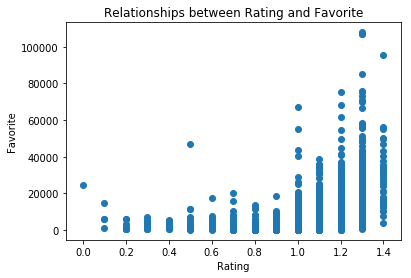

In [126]:
plt.scatter(rating1.rating, rating1.favorites);
plt.title('Relationships between Rating and Favorite');
plt.xlabel('Rating');
plt.ylabel('Favorite');

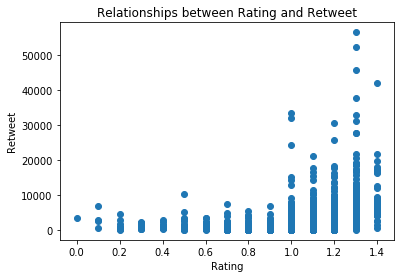

In [127]:
plt.scatter(rating1.rating, rating1.retweets);
plt.title('Relationships between Rating and Retweet');
plt.xlabel('Rating');
plt.ylabel('Retweet');

From the two figures above, we can clearly see that in general, tweets with higher ratings tend to have more favorites and retweets. It shows that the ratings are representative of people's thoughts towards dogs to some extent. Also, people tend to use the favorite function rather than using retweet.

#### Favorites and Retweets of Top 15 Dog Breeds

In [93]:
twitter_dog = twitter_clean_final[twitter_clean_final.dog_or_not == True]

In [162]:
twitter_dog.prediction.value_counts().head(15)

Golden_retriever            136
Labrador_retriever           94
Pembroke                     88
Chihuahua                    78
Pug                          54
Chow                         41
Samoyed                      40
Pomeranian                   38
Toy_poodle                   37
Malamute                     29
Cocker_spaniel               27
French_bulldog               26
Chesapeake_bay_retriever     23
Miniature_pinscher           21
Siberian_husky               20
Name: prediction, dtype: int64

In [169]:
top_dog_breed = twitter_dog.groupby('prediction').filter(lambda x: len(x) >= 20)

In [170]:
top_dog_breed.prediction.value_counts()

Golden_retriever            136
Labrador_retriever           94
Pembroke                     88
Chihuahua                    78
Pug                          54
Chow                         41
Samoyed                      40
Pomeranian                   38
Toy_poodle                   37
Malamute                     29
Cocker_spaniel               27
French_bulldog               26
Chesapeake_bay_retriever     23
Miniature_pinscher           21
German_shepherd              20
Siberian_husky               20
Name: prediction, dtype: int64

In [171]:
top_dog_breed = top_dog_breed.groupby('prediction').mean().reset_index()

In [173]:
top_dog_breed

,prediction,favorites,retweets,rating,confidence,dog_or_not
0,Chesapeake_bay_retriever,10130.304348,2730.130435,1.078261,0.544114,True
1,Chihuahua,8634.948718,2815.512821,1.069231,0.587447,True
2,Chow,9859.536585,2838.073171,1.160976,0.615648,True
3,Cocker_spaniel,11697.222222,3724.481481,1.129630,0.535376,True
4,French_bulldog,17913.000000,4683.923077,1.126923,0.770627,True
5,German_shepherd,10154.650000,2658.700000,1.100000,0.719445,True
6,Golden_retriever,12408.441176,3673.308824,1.158088,0.727063,True
7,Labrador_retriever,11880.968085,3884.138298,1.112766,0.656606,True
8,Malamute,8592.379310,2545.482759,1.089655,0.589451,True
9,Miniature_pinscher,8947.095238,2483.666667,1.066667,0.512709,True


In [267]:
top = twitter_dog.groupby('prediction').filter(lambda x: len(x) >= 20)

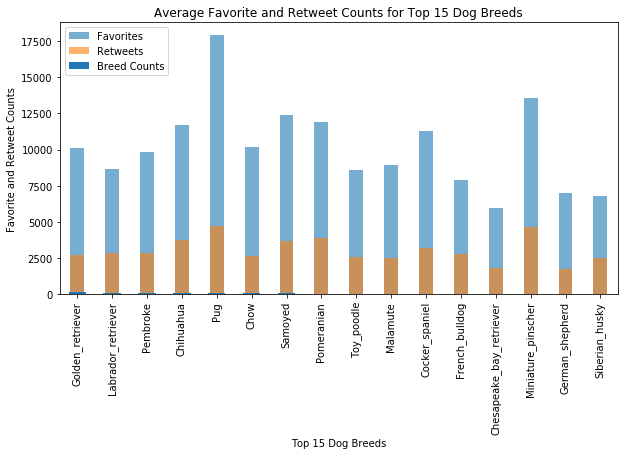

In [268]:
plt.figure(figsize = (10,5));
plt.bar(top_dog_breed.prediction,top_dog_breed.favorites, alpha = 0.6, width = 0.4, label='Favorites');
plt.bar(top_dog_breed.prediction,top_dog_breed.retweets, alpha = 0.6, width = 0.4, label='Retweets');
top.prediction.value_counts().plot(kind='bar', label='Breed Counts')
plt.xticks(rotation=90);
plt.legend(loc="upper left");
plt.title('Average Favorite and Retweet Counts for Top 15 Dog Breeds');
plt.xlabel('Top 15 Dog Breeds');
plt.ylabel('Favorite and Retweet Counts');

The top 15 dog breeds on x axis is in a descending order based on the breed counts. The tweet count for each breed is quite small comparing to the favorite and retweet counts, so it's just used for ordering the x labels. From the figure, the breeds that have more tweets don't necessarily have more favorites and retweets; the breeds that have more favorites/retweets tend to have more retweets/favorites as well; Pug and Miniature Pinscher have more favorites and retweets among those dog breeds, which suggests that they are very popular dog breeds.

#### Time and Tweet Counts

In [211]:
twitter_date = twitter_clean_final.copy()

In [212]:
twitter_date.timestamp = twitter_date.timestamp.astype(str)

In [213]:
twitter_date.timestamp = twitter_date.timestamp.str[0:10]

In [215]:
twitter_date.timestamp = pd.to_datetime(twitter_date.timestamp)

In [241]:
twitter_date = twitter_date.groupby('timestamp').count().reset_index()
twitter_date = twitter_date[['timestamp','tweet_id']]

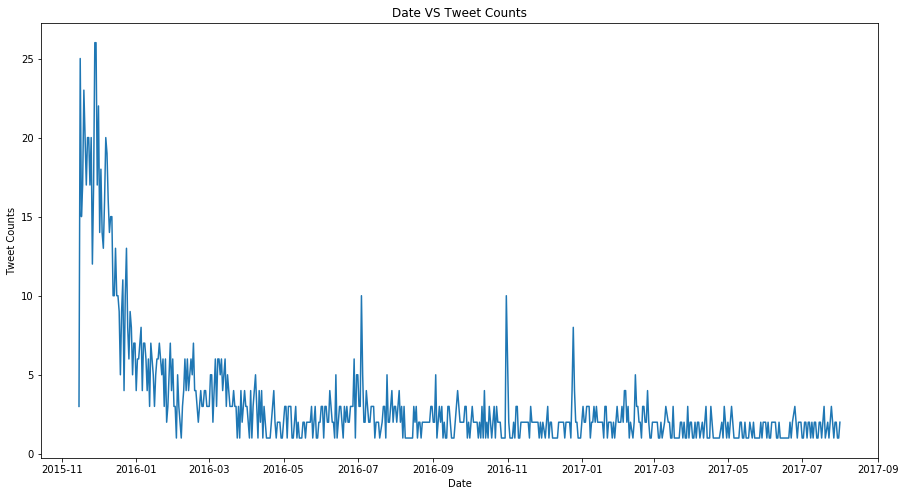

In [243]:
plt.figure(figsize = (15,8));
plt.plot(twitter_date.timestamp, twitter_date.tweet_id);
plt.title('Date VS Tweet Counts');
plt.xlabel('Date');
plt.ylabel('Tweet Counts');

The above figure shows the tweet counts from 2015-11 to 2017-08, it's clear that in the first two months after they start the account (2015-11), the everyday tweet counts is about 15-20, then it began to decrease and maintain a stable condition in the next two years.
Maybe the operator of @dog_rates found that it's hard to post that many tweets per day after several months operations, so the operator chose to reduce the tweet counts in order to assure the quality.